# Alissa Beaderstadt: Machine Learning Project 7

Author: Alissa Beaderstadt

GitHub Repository: https://github.com/abeaderstadt/datafun-07-ml


# Imports
Below are the necessary imports for this notebook:

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



# Part 1 - Chart a Straight Line
Follow the instructions from 10.16 (starting page 414):

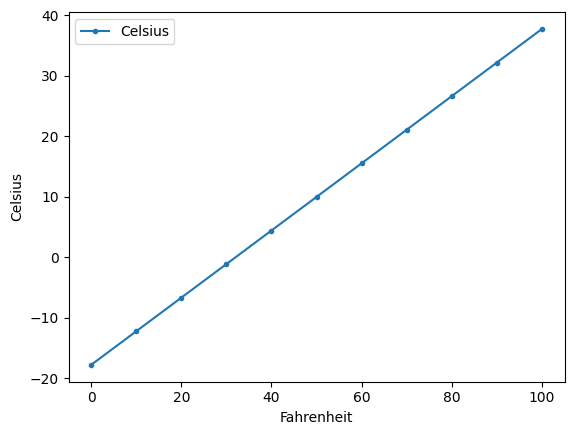

In [163]:
# Use pandas DataFrames to plot Celsius vs Fahrenheit 
c = lambda f: 5/9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]

# Graph the function
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

#  Part 2 - Prediction


### Section 1 - Data Acquisition
Follow the instructions to load NY City January high temperature from a csv file into a DataFrame:

In [164]:
# Load and display the New York City data from ave_hi_nyc_jan_1895-2018.csv:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection
Follow the instructions to view head and tail of the file:

In [165]:
# Look at the DataFrame's head and tail to get a sense of the data:
nyc_df.head()


,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [166]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning
Follow the instructions to clean the data. Improve the column names and clean up the date series:

In [167]:
# For readability, let's rename the 'Value' column as 'Temperature':
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Look at the first 3 rows of the updated DataFrame
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [168]:
# For readability, let's remove 01 (for January) from the x-axis labels (this example processes only January temps)
# Check the Column Type
nyc_df.Date.dtype

dtype('int64')

In [169]:
# Divide by 100 to truncate the last two digits
nyc_df.Date = nyc_df.Date.floordiv(100)

# Look at the first 3 rows of the updated DataFrame
nyc_df.head(3)


,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics
Use describe() to calculate basic descriptive statistics for the dataset:

In [170]:
# Set the display precision to 2 decimal places. Use 'display.precision' instead of 'precision' as shown in the text
pd.set_option('display.precision', 2)

# For some quick statistcs on the dataset's temperatures call describe on the Temperature column
nyc_df.Temperature.describe()



count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model
Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data:

In [171]:
linear_regression = stats.linregress(x=nyc_df.Date,
                                   y=nyc_df.Temperature)

# Calculate slope
print(linear_regression.slope)



0.014771361132966163


In [172]:
# Calculate intercept
print(linear_regression.intercept)

8.694993233674289


### Section 6 - Predict
Use your model to predict the "average high temp in Jan" for the year 2024 (just like they did for 2019):

In [173]:
# Predict the average January temperature in NYC for a given year (2024)
print(linear_regression.slope * 2024 + linear_regression.intercept)

38.5922281667978


### Section 7 - Visualizations
Use Seaborn to generate a scatter plot with a best fit line:

(10.0, 70.0)

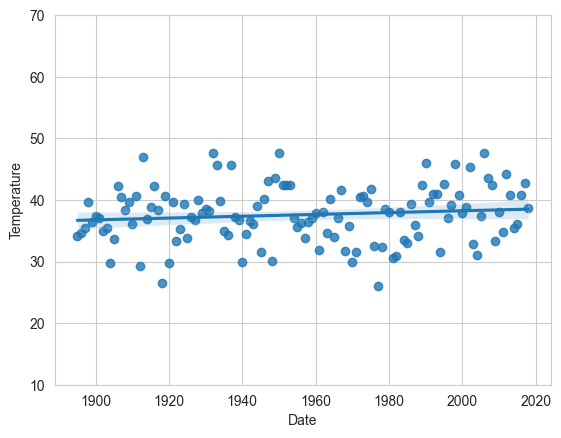

In [174]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10, 70)